In [1]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import quantum_info

import warnings
warnings.filterwarnings('ignore')

In quantum machine learning, cost function $\mathcal{L}(\boldsymbol{\theta})$ is defined by

\begin{aligned}
    \mathcal{L}(\boldsymbol{\theta}) &= \frac{1}{N}\sum_i f(l_i(\boldsymbol{\theta}),y_i),
\end{aligned}

where $l_i(\boldsymbol{\theta}) = \operatorname{Tr}[\rho_i(\boldsymbol{\theta})\,O]$ and $f$ is some non-linear function.

Under some conditions on the structure of a circuit, the variance of cost function gradient is upper bounded by the following quantity:


\begin{aligned}
\text{Var}[∂_νL(\boldsymbol{\theta})]

&\leq
2\max_{i,\boldsymbol{\theta}} [\partial_\nu f]
\times
\frac{1}{N}\sum_i \text{Var}[∂_ν l_i(\boldsymbol{\theta})]\\

&=
2\max_{i,\boldsymbol{\theta}} [\partial_\nu f]
\times r_{n,s} \times
\frac{1}{N}\sum_i D_{HS} ( ρ_i^{(h)} , \mathbb{I}/2^s )\\

\end{aligned}


To analyze the upper bound for a simple case, we assume that emedding circuit is "haar random".

Under this assumption, the upper bound is given by the following integral:


\begin{aligned}
\frac{1}{N}\sum_{i} D_{HS}(\rho_i^{h},\mathbb{I}/2^s)
&= \frac{1}{N}\sum_{i} \operatorname{Tr}[(\rho_i^h)^2] - 1/2^s, \,\,
\rho_i^h=\operatorname{Tr}_{\overline{h}}[V_{\boldsymbol{x}_i}|0\rangle\langle0| V^\dagger_{\boldsymbol{x}_i}]\\
&\sim\int_{\mathcal{U}(d)}\operatorname{Tr}[(\text{Tr}_{\overline{h}}[V|0\rangle\langle0|V^\dagger])^2] d\mu_{\text{Haar}}(V) - 1/2^s\\
&= \frac{2^s + 2^{-s}}{2^n + 1}
\end{aligned}

### s=1

In [2]:
s = 1
nqubits_list = np.arange(s, 7)
dims_list = 2**np.arange(s, 7)

trace_list1 = []

for dims in dims_list:
    sample_list = []
    for i in range(1, 10**2):
        random_unitary = quantum_info.random_unitary(dims)
        initial_state_matrix = np.zeros((dims, dims)); initial_state_matrix[0, 0] = 1
        random_pure_density_matrix = random_unitary @ initial_state_matrix @ random_unitary.adjoint()
        random_pure_density_matrix = quantum_info.DensityMatrix(random_pure_density_matrix)

        n = int(np.log2(dims))
        traced_random_pure_density_matrix = quantum_info.partial_trace(random_pure_density_matrix, list(np.arange(n-s)) )
        sample_list.append(quantum_info.purity(traced_random_pure_density_matrix))

    trace_list1.append(np.mean(sample_list) - 1/2**s)

In [5]:
# analytical result
def analytical(s,n):
    return (2**s - 2**(-s))/(2**n + 1)

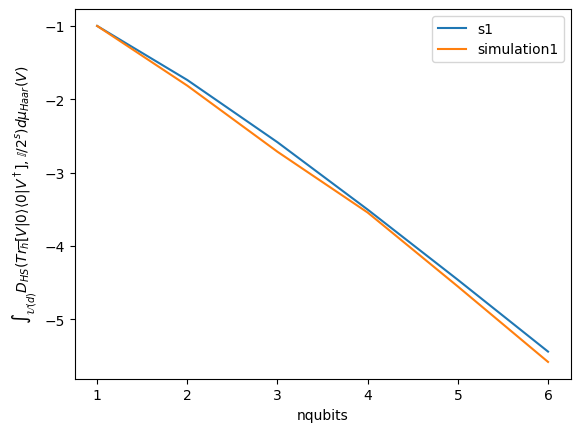

In [6]:
y1 = analytical(s, nqubits_list)

plt.plot(nqubits_list , np.log2(y1), label='s1')
plt.plot(nqubits_list , np.log2(trace_list1), label='simulation1')
plt.legend()
plt.xlabel('nqubits')
#plt.ylabel('mean purity of reduced system')
plt.ylabel('$\int_{\mathcal{U}(d)}D_{HS}(Tr_{\overline{h}}[V|0\\rangle\langle0| V^\dagger],\mathbb{I}/2^s) d\mu_{Haar}(V)$')
plt.show()

### s=1,2,3,...

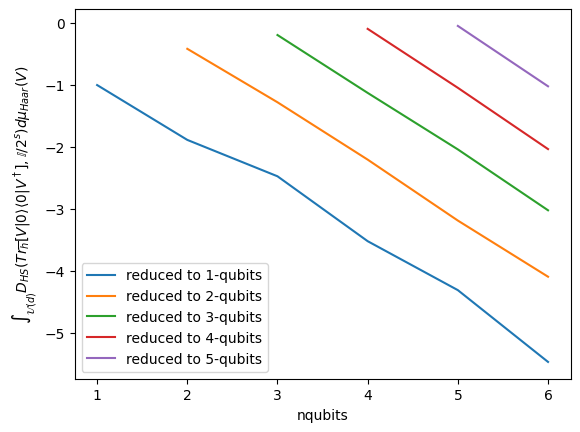

In [10]:
ss = [1,2,3,4,5]

for s in ss:
    nqubits_list = np.arange(s, 7)
    dims_list = 2**np.arange(s, 7)
    trace_s_list = []

    for dims in dims_list:
        sample_list = []
        for i in range(1, 10**2):
            random_unitary = quantum_info.random_unitary(dims)
            initial_state_matrix = np.zeros((dims, dims)); initial_state_matrix[0, 0] = 1
            random_pure_density_matrix = random_unitary @ initial_state_matrix @ random_unitary.adjoint()
            random_pure_density_matrix = quantum_info.DensityMatrix(random_pure_density_matrix)

            n = int(np.log2(dims))
            traced_random_pure_density_matrix = quantum_info.partial_trace(random_pure_density_matrix, list(np.arange(n - s)))
            sample_list.append(quantum_info.purity(traced_random_pure_density_matrix))

        trace_s_list.append(np.mean(sample_list) - 1/2**s)

    nqubits_list = np.arange(s, 7)
    plt.plot(nqubits_list, np.log2(trace_s_list), label=f'reduced to {s}-qubits')
plt.legend()
plt.xlabel('nqubits')
plt.ylabel('$\int_{\mathcal{U}(d)}D_{HS}(Tr_{\overline{h}}[V|0\\rangle\langle0| V^\dagger],\mathbb{I}/2^s) d\mu_{Haar}(V)$')
plt.show()

### Since it's heavy to run numerical simulation for $n \geq 7$, I just show the analytical result here

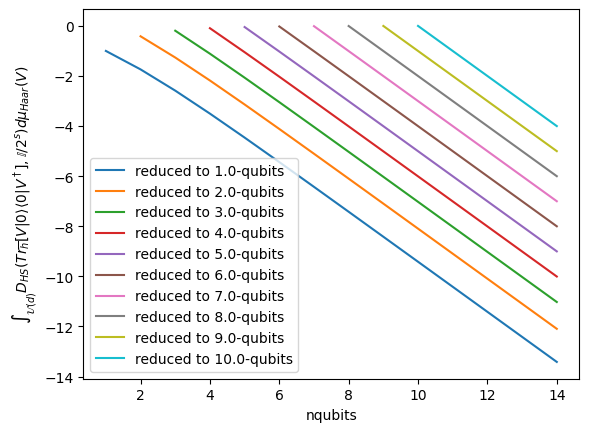

In [11]:
ss = np.linspace(1, 10, 10)

for s in ss:
    nqubits_list = np.arange(s, 15)
    dims_list = 2**np.arange(s, 15)

    trace_s_list = analytical(s, nqubits_list)

    plt.plot(nqubits_list, np.log2(trace_s_list), label=f'reduced to {s}-qubits')
plt.legend()
plt.xlabel('nqubits')
plt.ylabel('$\int_{\mathcal{U}(d)}D_{HS}(Tr_{\overline{h}}[V|0\\rangle\langle0| V^\dagger],\mathbb{I}/2^s) d\mu_{Haar}(V)$')
plt.show()

#### From the following equation, we should consider the coefficient $r_{n,s}$.

\begin{aligned}
\text{Var}[\partial_\nu l_i(\boldsymbol{\theta})] = r_{n,s}D_{HS} ( \rho_i^{(h)} , \mathbb{I}/2^s ), \quad
r_{n,s} = \frac{s\cdot 2^{3(s-1)}}{n^2\cdot (2^{2s}-1)^2}
\end{aligned}

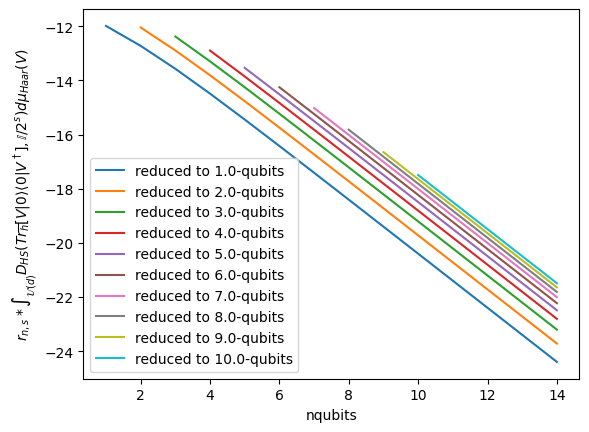

In [12]:
ss = np.linspace(1, 10, 10)

for s in ss:
    n = 15
    nqubits_list = np.arange(s, n)
    dims_list = 2**np.arange(s, n)

    trace_s_list = analytical(s, nqubits_list) * s*2**(3*(s-1))/n**2/(2**(2*s)-1)**2

    plt.plot(nqubits_list, np.log2(trace_s_list), label=f'reduced to {s}-qubits')
plt.legend()
plt.xlabel('nqubits')
plt.ylabel('$r_{n,s} * \int_{\mathcal{U}(d)}D_{HS}(Tr_{\overline{h}}[V|0\\rangle\langle0| V^\dagger],\mathbb{I}/2^s) d\mu_{Haar}(V)$')
plt.show()